In [107]:
from bs4 import BeautifulSoup as bs
from splinter import Browser
import pandas as pd
import matplotlib.pyplot as plt
import requests
import time

In [98]:
url = "https://musicalics.com/en/composers_alphabet/a"

executable_path = {'executable_path': 'chromedriver.exe'}
browser = Browser('chrome', **executable_path, headless=False)
browser.visit(url)

result = requests.get(url)
soup = bs(result.text, 'html.parser')

In [109]:
composers = []
composer_id = 1
alphabet = ["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"]

url = "https://musicalics.com/en/composers_alphabet/"

executable_path = {'executable_path': 'chromedriver.exe'}
browser = Browser('chrome', **executable_path, headless=False)
browser.visit(url)
    
for letter in alphabet:
    
    url = "https://musicalics.com/en/composers_alphabet/" + letter
    
    browser.click_link_by_partial_href("/en/composers_alphabet/" + letter)
    time.sleep(20)
    
    result = requests.get(url)
    soup = bs(result.text, 'html.parser')

    try:
        for page in range(1, 15): #number of pages

            html = browser.html
            soup = bs(html, 'html.parser')
            entry = soup.find_all("div", class_="views-row"[:9])

            for x in entry:
                try:
                    lastname = x.find("span", class_="views-field views-field-field-name").text.lstrip().rstrip().split(" ")

                    firstname = x.find("span", class_="views-field views-field-field-firstname").text.lstrip().rstrip().split(" ")

                    # Date of birth
                    if x.find("span", class_="views-field views-field-field-date-of-birth").text[2:].rstrip() == "?":
                        dob = "NaN"
                    else:
                        dob = x.find("span", class_="views-field views-field-field-date-of-birth").text[2:].rstrip()

                    composers.append({
                        "first_name": firstname[0], 
                        "last_name": lastname[-1],
                        "dob": dob,
                        "composer_id": composer_id
                    })
                except AttributeError:
                    pass

                composer_id += 1
            
            print(page)    
            
            browser.click_link_by_partial_text('volgende ›')
            time.sleep(20)
    except:
        pass
    

1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
1
2
3
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
1
1
2
3
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
1
2
3
1
2
1
2
3
4
5
6
7
8
9
1
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
1
1
2
3
4
5
1
2
3
4
5
1
1
1
2


In [110]:
composers_df = pd.DataFrame(composers)
composers_df

,composer_id,dob,first_name,last_name
0,1,1817,Mary,Beckett
1,2,1485,Nikolaus,Decius
2,3,1933,Jian,Ke
3,4,1600,Nicolaus,Kempis
4,5,1635,Johannes,Kempis
5,6,1642,Benedictus,Buns
6,7,1877,Thorvald,Aagaard
7,8,1964,Torstein,Aagaard-Nilsen
8,9,1593,"Truid,",Aagesen
9,10,1500,Johannes,Aal


In [111]:
composers_df.to_csv("composers.csv")

In [112]:
just_dob = composers_df.loc[composers_df["dob"] != "NaN"]
just_dob = pd.to_numeric(just_dob["dob"])
just_dob.head()

0    1817
1    1485
2    1933
3    1600
4    1635
Name: dob, dtype: int64

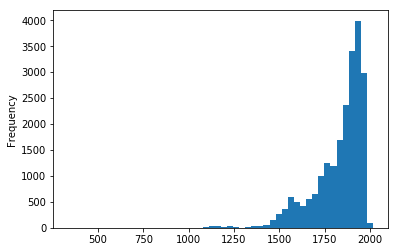

In [113]:
just_dob.plot(kind="hist", bins=50)
plt.show()

In [6]:
women_url = "https://musicalics.com/en/female-composers"

result = requests.get(women_url)
broth = bs(result.text, 'html.parser')

In [ ]:
women = []

# Women
for x in broth.find_all("span", class_="timeline-text"):
    fullname = x.text.rstrip().split(" ")
    w_first = fullname[0]
    w_last = fullname[-1]

    women.append({
        "first_name": w_first,
        "last_name": w_last
    })

pp.pprint(women)